<a href="https://colab.research.google.com/github/HXY1029/DSS5104_GrpPrj/blob/main/transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#load the data energy_processed
import pandas as pd
file_path = '/content/drive/MyDrive/group/transport_hourly_order_features.csv'
df = pd.read_csv(file_path)
df.head()

,PULocationID,pickup_hour,trip_count,hour,weekday,is_weekend,is_peak_hour,is_holiday,lag_1,lag_24,rolling_mean_6,rolling_mean_24
0,2,2024-02-11 14:00:00,1,14,6,1,0,0,1.0,1.0,1.0,1.0
1,2,2024-02-12 15:00:00,1,15,0,0,0,0,1.0,1.0,1.0,1.0
2,2,2024-02-13 01:00:00,1,1,1,0,0,0,1.0,1.0,1.0,1.0
3,2,2024-02-14 17:00:00,1,17,2,0,1,0,1.0,1.0,1.0,1.0
4,2,2024-02-16 21:00:00,1,21,4,0,0,0,1.0,1.0,1.0,1.0


In [ ]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

# 设置起止时间 这里选取了2.11-3.11一个月的数据集合
start_date = '2024-02-11'
end_date = '2024-03-11'

# 筛选数据
df = df[(df['pickup_hour'] >= start_date) & (df['pickup_hour'] <= end_date)]

In [ ]:
df.head()

,PULocationID,pickup_hour,trip_count,hour,weekday,is_weekend,is_peak_hour,is_holiday,lag_1,lag_24,rolling_mean_6,rolling_mean_24
0,2,2024-02-11 14:00:00,1,14,6,1,0,0,1.0,1.0,1.0,1.0
1,2,2024-02-12 15:00:00,1,15,0,0,0,0,1.0,1.0,1.0,1.0
2,2,2024-02-13 01:00:00,1,1,1,0,0,0,1.0,1.0,1.0,1.0
3,2,2024-02-14 17:00:00,1,17,2,0,1,0,1.0,1.0,1.0,1.0
4,2,2024-02-16 21:00:00,1,21,4,0,0,0,1.0,1.0,1.0,1.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 24, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 24, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,281 (520.63 KB)

 Trainable params: 132,897 (519.13 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 290s 80ms/step - loss: 0.0147 - mae: 0.0809 - val_loss: 0.0039 - val_mae: 0.0449 - learning_rate: 0.0010
Epoch 2/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 317s 79ms/step - loss: 0.0034 - mae: 0.0420 - val_loss: 0.0025 - val_mae: 0.0352 - learning_rate: 0.0010
Epoch 3/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 327s 80ms/step - loss: 0.0028 - mae: 0.0370 - val_loss: 0.0022 - val_mae: 0.0326 - learning_rate: 0.0010
Epoch 4/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 316s 79ms/step - loss: 0.0025 - mae: 0.0350 - val_loss: 0.0022 - val_mae: 0.0330 - learning_rate: 0.0010
Epoch 5/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 267s 76ms/step - loss: 0.0023 - mae: 0.0336 - val_loss: 0.0021 - val_mae: 0.0311 - learning_rate: 0.0010
Epoch 6/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 320s 76ms/step - loss: 0.0022 - mae: 0.0328 - val_loss: 0.0019 - val_mae: 0.0300 - learning_rate: 0.0010
Epoch 7/50
3505/3505 ━━━━━━━━━━━━━━━━━━━━ 319s 75ms/step - loss: 0.0021 - mae: 0.0317 - val_loss: 0.0019 - val_mae: 0.

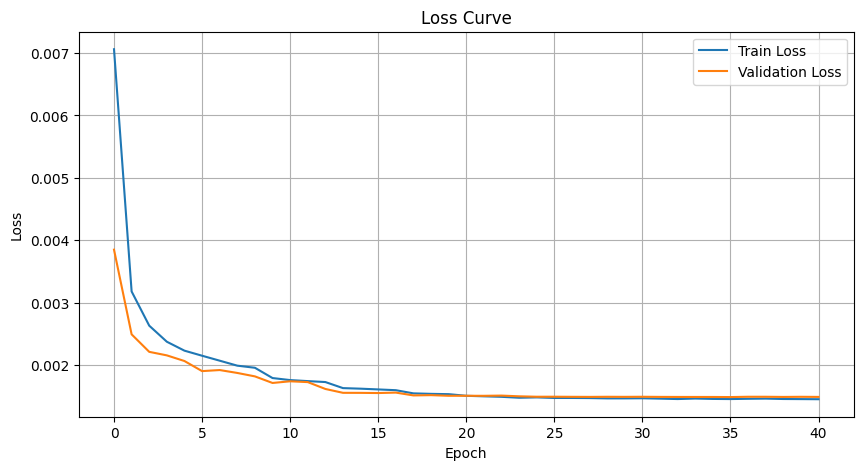

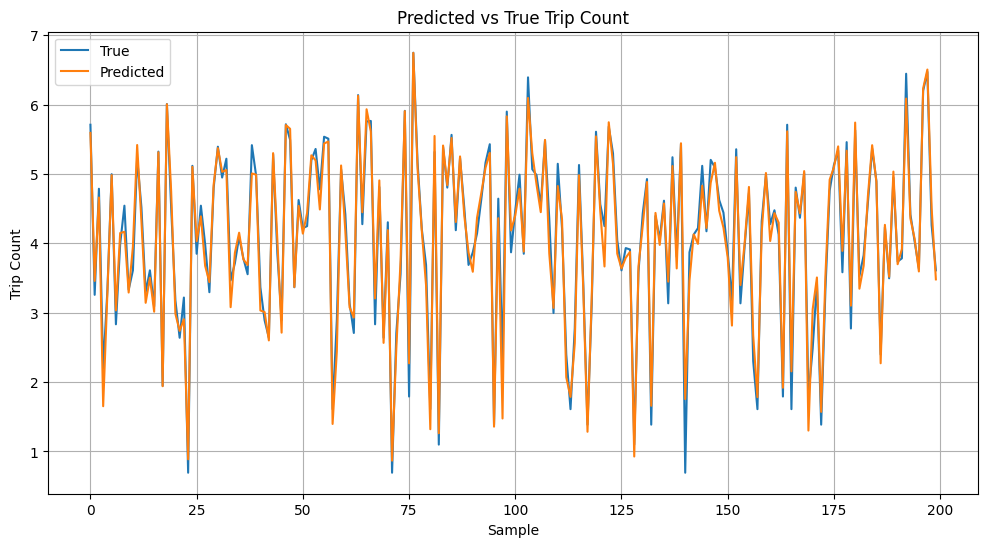

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ----------------------------
# 1. 数据预处理
# ----------------------------
# 特征和目标定义
features = ['hour', 'weekday', 'is_weekend', 'is_peak_hour', 'is_holiday',
            'lag_1', 'lag_24', 'rolling_mean_6', 'rolling_mean_24']
target = 'trip_count'

# 删除缺失值
df = df.dropna()

# 标准化输入特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 对目标变量做 log1p + MinMaxScaler 归一化
y = df[target].values
log1p_y = np.log1p(y).reshape(-1, 1)
target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(log1p_y).flatten()

# ----------------------------
# 2. 构建时间序列样本
# ----------------------------
def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)

# 划分训练与测试集
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# ----------------------------
# 3. 构建 LSTM 模型
# ----------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ----------------------------
# 4. 模型训练
# ----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# ----------------------------
# 5. 模型评估与反归一化预测
# ----------------------------
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE (scaled): {mae:.4f}")

y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# ----------------------------
# 6. 可视化
# ----------------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_true[:200], label='True')
plt.plot(y_pred[:200], label='Predicted')
plt.title('Predicted vs True Trip Count')
plt.xlabel('Sample')
plt.ylabel('Trip Count')
plt.legend()
plt.grid(True)
plt.show()
